# Logistic Regression

So far we have been modelling $E[y|\mathbf{x}]$ through a multiple linear regression model, i.e., $E[y|\mathbf{x}]=\mathbf{x}^\prime\boldsymbol{\beta}$. When $y\in\{0,1\}$, the left-hand side of this equality becomes
$$
\begin{aligned}
E[y|\mathbf{x}]&=1\times\Pr\{y=1|\mathbf{x}\}+0\times(1-\Pr\{y=1|\mathbf{x}\})\\
&=\Pr\{y=1|\mathbf{x}\}.
\end{aligned}
$$
<ins>Linear Probability Model</ins>: If we stick to a multiple linear regression model one has

$$
\Pr\{y=1|\mathbf{x}\}=\mathbf{x}^\prime\boldsymbol{\beta}.
$$

⚠️ The $\Pr\{y=1|\mathbf{x}\}$ is not necessarily bounded between 0 and 1 as $\mathbf{x}^\prime\boldsymbol{\beta}$ moves from $-\infty$ to $+\infty$.

<ins>Logistic Model</ins>: If we were to put the 'index' $\mathbf{x}^\prime\boldsymbol{\beta}$ inside the [standard logistic function](https://en.wikipedia.org/wiki/Logistic_function) $\Lambda(u)=[1+\exp{(-u)}]^{-1}$ and set

$$
\Pr\{y=1|\mathbf{x}\}=\Lambda(\mathbf{x}^\prime\boldsymbol{\beta}),
$$

this is known as the *Logistic Link Regression*

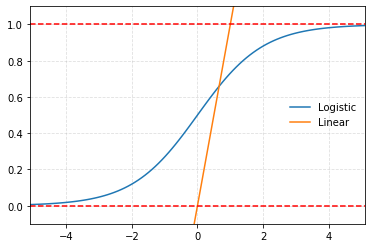

In [1]:
import matplotlib.pyplot as plt
import numpy as np

axes = plt.gca()
axes.set_xlim([-5.1,5.1])
axes.set_ylim([-.1,1.1])

u = np.linspace(-5.1,5.1,100,endpoint=True)
plt.plot(u,1/(1+np.exp(-u)),label='Logistic')
plt.plot(u,u,label='Linear')
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=1, color='r', linestyle='--')
plt.legend(framealpha=0.0)
plt.grid(alpha=0.4,linestyle='--') #Adding a grid

Simple manipulations shows that

$$
\begin{aligned}
\Pr\{y=1|\mathbf{x}\}&=\Lambda(\mathbf{x}^\prime\boldsymbol{\beta})=\frac{1}{1+\exp{(-\mathbf{x}^\prime\boldsymbol{\beta})}}\\
&=\frac{\exp{(\mathbf{x}^\prime\boldsymbol{\beta})}}{1+\exp{(\mathbf{x}^\prime\boldsymbol{\beta})}},\\
1-\Pr\{y=1|\mathbf{x}\}&=\frac{1}{1+\exp{(\mathbf{x}^\prime\boldsymbol{\beta})}}\text{, and therefore}\\
\frac{\Pr\{y=1|\mathbf{x}\}}{1-\Pr\{y=1|\mathbf{x}\}}&=\exp{(\mathbf{x}^\prime\boldsymbol{\beta})}.\\
\log{\left(\frac{\Pr\{y=1|\mathbf{x}\}}{1-\Pr\{y=1|\mathbf{x}\}}\right)}&=\mathbf{x}^\prime\boldsymbol{\beta}.
\end{aligned}
$$

If we define $\Pr\{y=1|\mathbf{x}\}=p(\mathbf{x})$ as the probability of 'success,' then $p(\mathbf{x})/[1-p(\mathbf{x})]$ is called the [*odds*](https://en.wikipedia.org/wiki/Logit), and can take on *any* value between 0 and $\infty$. Similarly the log of the odds is called the *log-odds* or *logit*.

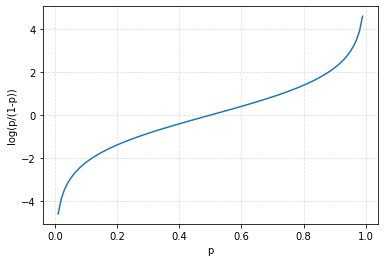

In [2]:
p = np.linspace(0.01,0.99,100,endpoint=True)
plt.plot(p,np.log(p/(1-p)))
plt.xlabel('p')
plt.ylabel('log(p/(1-p))')
plt.grid(alpha=.4,linestyle='--') #Adding a grid

<ins>Example</ins>: If the probability of success is 0.8, i.e., $p(\mathbf{x})=0.8$, then the odds equal $\frac{0.8}{1-0.8}=4$ and one says that the odds of success is 4 to 1. Similarly if the probability of success is 0.5, i.e. $p(\mathbf{x})=0.5$, then the odds equal $\frac{0.5}{1-0.5}=1$ and we say that the odds of success is 1 to 1 in this case.

**Note**: The parameter $\beta_j$ represents how an increase of one unit of $x_j$ on average changes the *log-odds*, or equivalently $\exp{(\beta_j)}$ represents how an increase of one unit of $x_j$ on average changes the *odds*.

💻 We are going to model female labor force participation decision based on various household characteristics.

In [3]:
import pandas as pd

df = pd.read_stata('http://fmwww.bc.edu/ec-p/data/wooldridge/mroz.dta')
df.head()
tmp = ["kidslt6", "kidsge6", "age", "educ","exper", "hushrs", "husage", "huseduc","huswage","nwifeinc","mtr","unem"]
for x in tmp:
    df[x+'_dmean'] = df[x] - df[x].mean(skipna = True)
print(list(df))

['inlf', 'hours', 'kidslt6', 'kidsge6', 'age', 'educ', 'wage', 'repwage', 'hushrs', 'husage', 'huseduc', 'huswage', 'faminc', 'mtr', 'motheduc', 'fatheduc', 'unem', 'city', 'exper', 'nwifeinc', 'lwage', 'expersq', 'kidslt6_dmean', 'kidsge6_dmean', 'age_dmean', 'educ_dmean', 'exper_dmean', 'hushrs_dmean', 'husage_dmean', 'huseduc_dmean', 'huswage_dmean', 'nwifeinc_dmean', 'mtr_dmean', 'unem_dmean']


In [4]:
# mk interact trms
tmpstr = []
for x in range(len(tmp)):
    for y in tmp[x+1:]:
        if x != y:
            tmpstr.append('('+tmp[x]+'_dmean*'+y+'_dmean'+')')
print(list(tmpstr))

['(kidslt6_dmean*kidsge6_dmean)', '(kidslt6_dmean*age_dmean)', '(kidslt6_dmean*educ_dmean)', '(kidslt6_dmean*exper_dmean)', '(kidslt6_dmean*hushrs_dmean)', '(kidslt6_dmean*husage_dmean)', '(kidslt6_dmean*huseduc_dmean)', '(kidslt6_dmean*huswage_dmean)', '(kidslt6_dmean*nwifeinc_dmean)', '(kidslt6_dmean*mtr_dmean)', '(kidslt6_dmean*unem_dmean)', '(kidsge6_dmean*age_dmean)', '(kidsge6_dmean*educ_dmean)', '(kidsge6_dmean*exper_dmean)', '(kidsge6_dmean*hushrs_dmean)', '(kidsge6_dmean*husage_dmean)', '(kidsge6_dmean*huseduc_dmean)', '(kidsge6_dmean*huswage_dmean)', '(kidsge6_dmean*nwifeinc_dmean)', '(kidsge6_dmean*mtr_dmean)', '(kidsge6_dmean*unem_dmean)', '(age_dmean*educ_dmean)', '(age_dmean*exper_dmean)', '(age_dmean*hushrs_dmean)', '(age_dmean*husage_dmean)', '(age_dmean*huseduc_dmean)', '(age_dmean*huswage_dmean)', '(age_dmean*nwifeinc_dmean)', '(age_dmean*mtr_dmean)', '(age_dmean*unem_dmean)', '(educ_dmean*exper_dmean)', '(educ_dmean*hushrs_dmean)', '(educ_dmean*husage_dmean)', '(educ

In [5]:
# mk specifications str
f1 = 'inlf ~ -1 + city +' + ''.join([x+'+' for x in tmp])[:-1]
f2 = f1 + ' + ' + ''.join([x+'+' for x in tmpstr])[:-1] + ''.join(['-'+x+'_dmean' for x in tmp])

# prt specifications str
print(f1)
print(f2)

inlf ~ -1 + city +kidslt6+kidsge6+age+educ+exper+hushrs+husage+huseduc+huswage+nwifeinc+mtr+unem
inlf ~ -1 + city +kidslt6+kidsge6+age+educ+exper+hushrs+husage+huseduc+huswage+nwifeinc+mtr+unem + (kidslt6_dmean*kidsge6_dmean)+(kidslt6_dmean*age_dmean)+(kidslt6_dmean*educ_dmean)+(kidslt6_dmean*exper_dmean)+(kidslt6_dmean*hushrs_dmean)+(kidslt6_dmean*husage_dmean)+(kidslt6_dmean*huseduc_dmean)+(kidslt6_dmean*huswage_dmean)+(kidslt6_dmean*nwifeinc_dmean)+(kidslt6_dmean*mtr_dmean)+(kidslt6_dmean*unem_dmean)+(kidsge6_dmean*age_dmean)+(kidsge6_dmean*educ_dmean)+(kidsge6_dmean*exper_dmean)+(kidsge6_dmean*hushrs_dmean)+(kidsge6_dmean*husage_dmean)+(kidsge6_dmean*huseduc_dmean)+(kidsge6_dmean*huswage_dmean)+(kidsge6_dmean*nwifeinc_dmean)+(kidsge6_dmean*mtr_dmean)+(kidsge6_dmean*unem_dmean)+(age_dmean*educ_dmean)+(age_dmean*exper_dmean)+(age_dmean*hushrs_dmean)+(age_dmean*husage_dmean)+(age_dmean*huseduc_dmean)+(age_dmean*huswage_dmean)+(age_dmean*nwifeinc_dmean)+(age_dmean*mtr_dmean)+(age_dmean

In [6]:
import patsy
y1, X1 = patsy.dmatrices(f1, data=df, return_type='dataframe')
y2, X2 = patsy.dmatrices(f2, data=df, return_type='dataframe')
print(list(X1))
print(list(X2))

['city', 'kidslt6', 'kidsge6', 'age', 'educ', 'exper', 'hushrs', 'husage', 'huseduc', 'huswage', 'nwifeinc', 'mtr', 'unem']
['city', 'kidslt6', 'kidsge6', 'age', 'educ', 'exper', 'hushrs', 'husage', 'huseduc', 'huswage', 'nwifeinc', 'mtr', 'unem', 'kidslt6_dmean:kidsge6_dmean', 'kidslt6_dmean:age_dmean', 'kidslt6_dmean:educ_dmean', 'kidslt6_dmean:exper_dmean', 'kidslt6_dmean:hushrs_dmean', 'kidslt6_dmean:husage_dmean', 'kidslt6_dmean:huseduc_dmean', 'kidslt6_dmean:huswage_dmean', 'kidslt6_dmean:nwifeinc_dmean', 'kidslt6_dmean:mtr_dmean', 'kidslt6_dmean:unem_dmean', 'kidsge6_dmean:age_dmean', 'kidsge6_dmean:educ_dmean', 'kidsge6_dmean:exper_dmean', 'kidsge6_dmean:hushrs_dmean', 'kidsge6_dmean:husage_dmean', 'kidsge6_dmean:huseduc_dmean', 'kidsge6_dmean:huswage_dmean', 'kidsge6_dmean:nwifeinc_dmean', 'kidsge6_dmean:mtr_dmean', 'kidsge6_dmean:unem_dmean', 'age_dmean:educ_dmean', 'age_dmean:exper_dmean', 'age_dmean:hushrs_dmean', 'age_dmean:husage_dmean', 'age_dmean:huseduc_dmean', 'age_dm

💻 We now partition the augmented data set into the train (75% of the original observations) and test (25% of the original observations) data sets.

In [7]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=3)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=3)

## printing the response variable for the training set
print(y2_train)

     inlf
356   1.0
549   0.0
591   0.0
417   1.0
215   1.0
..    ...
659   0.0
256   1.0
643   0.0
249   1.0
664   0.0

[564 rows x 1 columns]


## Estimating the Regression Coefficients

Firstly remember that if we have a *random sample*, then the joint probability of observing the sequence of $n$ ones and zeroes above is given by

$$
\begin{aligned}
&p(\mathbf{x}_1)\cdot(1- p(\mathbf{x}_2))\cdot (1-p(\mathbf{x}_3))\cdot p(\mathbf{x}_4)\cdot p(\mathbf{x}_5)\ldots\\
& = \prod_{i=1}^{n} p(\mathbf{x}_i)^{y_i}[1-p(\mathbf{x}_i)]^{1-y_i}\\
& = \prod_{i=1}^{n} \Lambda(\mathbf{x}_i^\prime\boldsymbol{\beta})^{y_i}[1-\Lambda(\mathbf{x}_i^\prime\boldsymbol{\beta})]^{1-y_i}\\
&=L(\boldsymbol{\beta}|y_1,\ldots,y_n;\mathbf{x}_1,\ldots,\mathbf{x}_n)\\
&=:L_n(\boldsymbol{\beta}).
\end{aligned}
$$

The function $L_n(\boldsymbol{\beta})$ is called the [*likelihood function*](https://en.wikipedia.org/wiki/Likelihood_function) and if we take the natural logarithm, i.e.,

$$\ell_n(\boldsymbol{\beta})=\log{L_n(\boldsymbol{\beta})}$$

is called the *log-likelihood function*. Therefore, we can estimate $\boldsymbol{\beta}$ by maximizing the *log-likelihood function* as this equivalent as to finding the $\boldsymbol{\beta}$ that maximizes the joint probability to observe the sample we have, i.e., $\widehat{\boldsymbol{\beta}}=\underset{\mathbf{b}}{\text{arg max }} \ell_n(\mathbf{b})$.

💻 We start by estimating the base model, i.e, $\mathbf{x}$=(1,```city```,```kidslt6```,```kidsge6```,```age```,```educ```,```exper```,```hushrs```,```husage```,```huseduc```,```huswage```,```nwifeinc```,```mtr```,```unem```)$^\prime$.

In [8]:
from sklearn.linear_model import LogisticRegression
logit1 = LogisticRegression(fit_intercept=True,max_iter=1000,solver='lbfgs',penalty='none').fit(X1, y1.values.ravel())
print(pd.Series(np.exp(logit1.coef_).transpose(1,0).tolist(), index = X1_train.columns))

city         [1.0427819983658693]
kidslt6     [0.26504124357107334]
kidsge6      [1.1381613112088558]
age          [0.9287129270863793]
educ         [1.3488723701972896]
exper        [1.1284078036602487]
hushrs        [0.999803371576326]
husage       [1.0016367812209164]
huseduc      [0.9766799629905512]
huswage      [0.9828735498117639]
nwifeinc     [0.9848336455761428]
mtr          [0.8280626506300233]
unem         [0.9821902281996138]
dtype: object


### [Interpreting the Logit Coefficients](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/)

💻 Holding everything else constant, one extra year of ```educ``` will make the odds of a woman to be working for wages to be 34.88% higher. The odds of a woman working for wages in a ```city``` is 1.043 times that if she were to live in a rural area (non-SMSA) instead. Having 1 extra ```kidslt6``` will reduce the odds of a woman to be working for wages by a factor of 0.265.

### Predicted Probabilities

💻 Once we have obtained $\widehat{\boldsymbol{\beta}}$ from the training set we can plug-in the features in the validation set and calculate the predicted probabilities to be in the labor force for observations in the validation set. If the predicted probability for observation $j$ in the validaton set is above 0.5 we can predict a 'success,' i.e., $\widehat{y}_j=1$ and $\widehat{y}_j=0$ otherwise. Since we *do* observe the actual outcome for said observation, i.e., $y_j$ we can count how many times our model predicted the correct outcome.

In [9]:
logit1.score(X1_test, y1_test)

0.7354497354497355

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matriz = confusion_matrix(y1_test, logit1.predict(X1_test))
print(confusion_matriz)

[[53 27]
 [23 86]]


## _Elastic Net_

💻 Now assume that we are interested in fitting a model with a larger set of features, like the one that contains the initial features in the base model *plus* all possible cross-products of the demeaned features excluding ```city```.

In this case we can implement the Elastic Net regression as explained before, i.e.,
$$
\widehat{\boldsymbol{\beta}}=\underset{\mathbf{b}}{\text{arg min }} -\ell_n(\mathbf{b}) +\lambda\left((1-\alpha)\|\mathbf{b}\|_{2}^{2}+\alpha\|\mathbf{b}\|_{1}\right).
$$

💻 It is recommended to scale the data before fitting and evaluating the model

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.fit_transform(X2_test)

💻 We will train our model using 5-fold cross-validation on the train data set over a combination of 20 values of $\lambda$, i.e., $\{10,5,3.33,2.5,\cdots,0.526,0.5\}$, and 10 values of $\alpha$, i.e., $\{0.1,0.18,\cdots,0.81,0.9\}$

In [15]:
from sklearn.model_selection import KFold
fold = KFold(n_splits=5, random_state=42, shuffle=True)

from sklearn.linear_model import LogisticRegressionCV
searchCV = LogisticRegressionCV(
    Cs=list(np.linspace(0.1,2,20,endpoint=True)) #this corresponds to 1/lambda above
    ,penalty='elasticnet'
    ,l1_ratios=np.linspace(0.1,0.9,10,endpoint=True) #this corresponds to alpha above
    ,scoring='accuracy' #proportion of main diag of confusion matrix
    ,cv=fold
    ,random_state=42
    ,max_iter=10000
    ,fit_intercept=True
    ,solver='saga' #only optimizer available for elasticnet
    ,tol=10
)
logit2_cv = searchCV.fit(X2_train, y2_train.values.ravel())

💻 We now recover the values $\widehat{\lambda}$ and $\widehat{\alpha}$ that maximized the average prediction accuracy in the 5 validation data sets.

In [16]:
logit2_cv.C_

array([1.3])

In [17]:
logit2_cv.l1_ratio_

array([0.72222222])

💻 We also calculate the proportion of true predictions and confusion matrix using the validation data set.

In [18]:
logit2_cv.score(X2_test, y2_test)

0.7248677248677249

In [19]:
confusion_matriz = confusion_matrix(y2_test, logit2_cv.predict(X2_test))
print(confusion_matriz)

[[50 30]
 [22 87]]
